In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')
data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
data['v1']=data['v1'].map({'ham': 0, 'spam': 1})
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


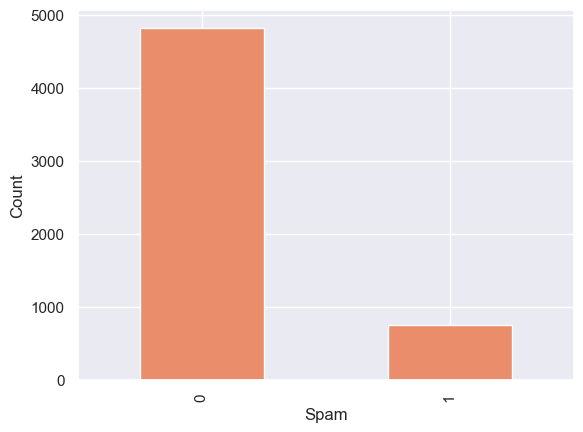

In [7]:
palette=sns.color_palette('flare')
sns.set(palette=palette)
data['v1'].value_counts().plot(kind='bar')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.show()

In [8]:
X_train, X_valid, y_train, y_valid= train_test_split(data['v2'], data['v1'], test_size=0.2,train_size=0.8)
X_train.head()

3974    do u think that any girl will propose u today ...
2962                       You dont know you jabo me abi.
1702                    I have lost 10 kilos as of today!
5472    Well obviously not because all the people in m...
4159    i felt so...not any conveying reason.. Ese he....
Name: v2, dtype: object

In [9]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_test= tfidf.transform(X_valid)

tfidf_matrix_train.shape
tfidf_matrix_test.shape

(1115, 7413)

In [10]:
LR_model=LogisticRegression(solver='liblinear')
LR_model.fit(tfidf_matrix_train, y_train)
y_pred=LR_model.predict(tfidf_matrix_test)

In [11]:
def eval(name, y_valid, y_pred):
    cm = confusion_matrix(y_valid, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for Random forrest: \n')
    print(classification_report(y_valid, y_pred))
    t1.plot()

Classification Report for Random forrest: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       959
           1       0.99      0.70      0.82       156

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



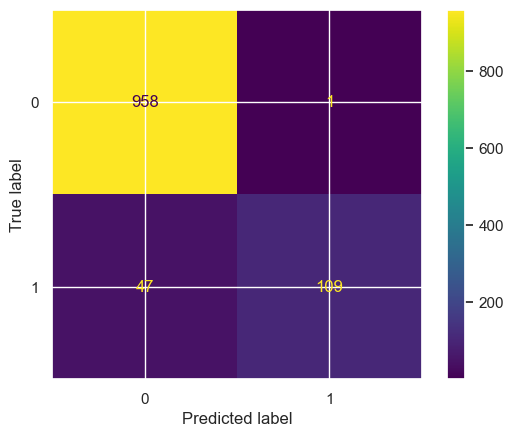

In [12]:
eval('Model Results', y_valid, y_pred)

Classification Report for Random forrest: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       959
           1       0.98      0.84      0.91       156

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



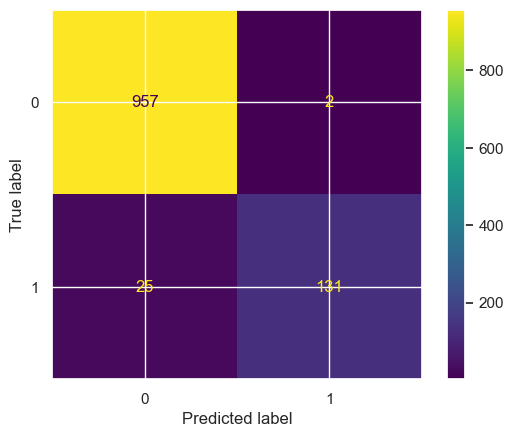

In [13]:
rf_model = RandomForestClassifier()
rf_model.fit(tfidf_matrix_train, y_train)
y_pred = rf_model.predict(tfidf_matrix_test)
def eval(name, y_valid, y_pred):
    cm = confusion_matrix(y_valid, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for Random forrest: \n')
    print(classification_report(y_valid, y_pred))
    t1.plot()
eval('Model Results', y_valid, y_pred)

Classification Report for Naive Bayes: 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       959
           1       1.00      0.76      0.86       156

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



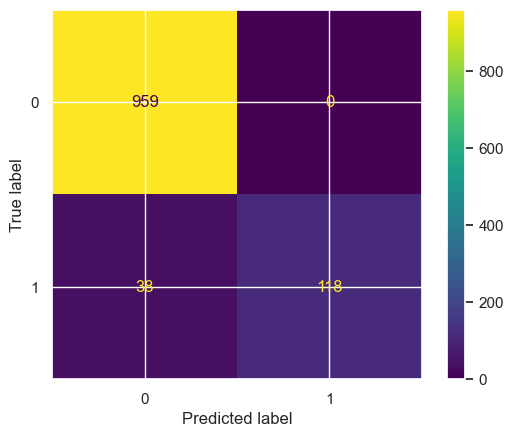

In [14]:
nb_model = MultinomialNB()
nb_model.fit(tfidf_matrix_train, y_train)
y_pred = nb_model.predict(tfidf_matrix_test)
def eval(name, y_valid, y_pred):
    cm = confusion_matrix(y_valid, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for Naive Bayes: \n')
    print(classification_report(y_valid, y_pred))
    t1.plot()
eval('Model Results', y_valid, y_pred)

Classification Report for SVM: 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       959
           1       0.99      0.88      0.93       156

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



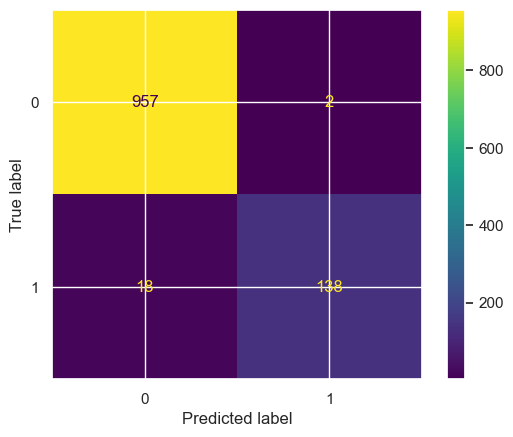

In [15]:
svm_model = SVC(kernel='rbf', C=10) #Radial Basis Function (RBF)
svm_model.fit(tfidf_matrix_train, y_train)
y_pred = svm_model.predict(tfidf_matrix_test)
def eval(name, y_test, y_pred):
    cm = confusion_matrix(y_valid, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for SVM: \n')
    print(classification_report(y_valid, y_pred))
    t1.plot()
eval('Model Results', y_valid, y_pred)

Classification Report for LDA: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       959
           1       0.95      0.80      0.87       156

    accuracy                           0.97      1115
   macro avg       0.96      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



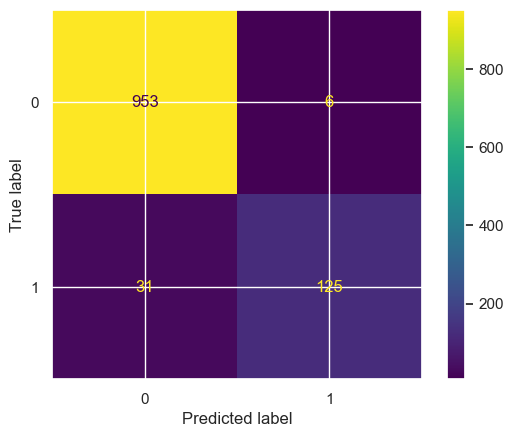

In [16]:
lda_model = LinearDiscriminantAnalysis(solver='lsqr') # least squares solution solver 
lda_model.fit(tfidf_matrix_train.toarray(), y_train)
y_pred = lda_model.predict(tfidf_matrix_test.toarray())
def eval(name, y_valid, y_pred):
    cm = confusion_matrix(y_valid, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for LDA: \n')
    print(classification_report(y_valid, y_pred))
    t1.plot()
eval('Model Results', y_valid, y_pred)

Classification Report for QDA: 

              precision    recall  f1-score   support

           0       0.99      0.44      0.61       959
           1       0.22      0.97      0.36       156

    accuracy                           0.51      1115
   macro avg       0.61      0.71      0.48      1115
weighted avg       0.88      0.51      0.57      1115



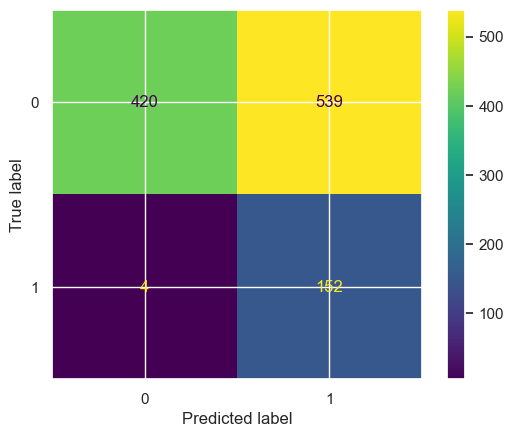

In [17]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(tfidf_matrix_train.toarray(), y_train)
y_pred = qda_model.predict(tfidf_matrix_test.toarray())
def eval(name, y_valid, y_pred):
    cm = confusion_matrix(y_valid, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for QDA: \n')
    print(classification_report(y_valid, y_pred))
    t1.plot()
eval('Model Results', y_valid, y_pred)